# Problem 2

Extend the linear regression model to a polynomial regression model with the
same dataset. Experiment with different polynomial degrees (e.g., 2, 3, and 4) to
analyze how the model complexity affects the fit. Evaluate each model's
performance using the Mean Squared Error (MSE) metric and visualize the
polynomial regression lines.

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import operator  # Importing the operator module

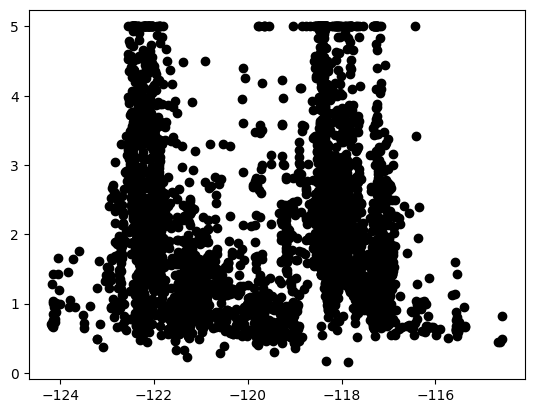

In [2]:
# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data[:, np.newaxis, 7]  # Using 'Median Income' as the feature
y = housing.target  # Median House Value as the target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up polynomial degrees to test
degrees = [2, 3, 4,5,6,7,8,9,10]

# Dictionary to store MSE for each degree
mse_dict = {}

# Plotting the actual data
plt.scatter(X_test, y_test, color='black', label='Actual data')

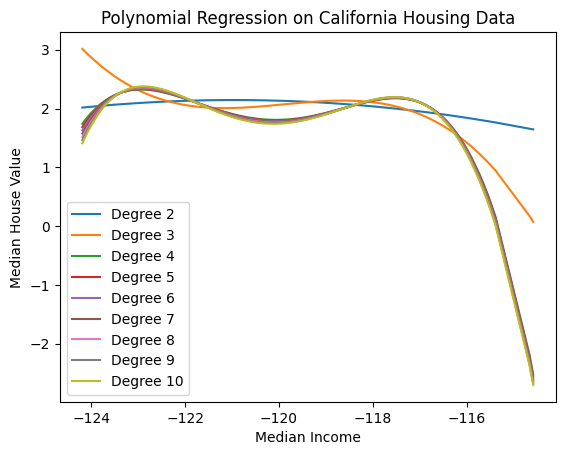

Mean Squared Error for each polynomial degree:
Degree 2: MSE = 1.3079454099754901
Degree 3: MSE = 1.2820612523678467
Degree 4: MSE = 1.2375126167536452
Degree 5: MSE = 1.2351021493031762
Degree 6: MSE = 1.2326371638540297
Degree 7: MSE = 1.2301243154180133
Degree 8: MSE = 1.2275705817419713
Degree 9: MSE = 1.2249831636874562
Degree 10: MSE = 1.2223693396857367


In [3]:
# Iterating over specified degrees to create polynomial regression models
for degree in degrees:
    # Creating a pipeline that first transforms features into polynomial features, then fits LinearRegression
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Training the model
    polynomial_model.fit(X_train, y_train)

    # Predicting on the testing set
    y_pred = polynomial_model.predict(X_test)

    # Calculating and storing MSE
    mse_dict[degree] = mean_squared_error(y_test, y_pred)

    # Sorting X_test and y_pred for plotting
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test, y_pred), key=sort_axis)
    X_test_sorted, y_pred_sorted = zip(*sorted_zip)

    # Plotting polynomial regression lines
    plt.plot(X_test_sorted, y_pred_sorted, label=f'Degree {degree}')

# Adding labels and title to the plot
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression on California Housing Data')
plt.legend()
plt.show()

# Printing MSE for each polynomial degree
print("Mean Squared Error for each polynomial degree:")
for degree, mse in mse_dict.items():
    print(f"Degree {degree}: MSE = {mse}")